In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely import wkt

In [29]:
# habe alle gpx track von http://www.bahntrassenradeln.de/bahn__karten.htm heruntergeladen und dann mithilfe von QGis (Batch GPS Importer) zu einerm gpkg umgewandelt
data =gpd.read_file(r"all_gpx_btr.gpkg")

C:\Users\Simon\Anaconda3\envs\geo_julab3\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [30]:
data#.head()

,id,elevation,name,comment,description,url,url_name,symbol,source,type,capture_time,feature_type,file_name,geometry
0,1,25.861,None,None,None,None,None,None,None,None,None,tracks,hh01.gpx,"LINESTRING (10.07816 53.49782, 10.07837 53.497..."
1,2,5.248,None,None,None,None,None,None,None,None,None,tracks,hh02.gpx,"LINESTRING (10.23262 53.47921, 10.23252 53.478..."
2,3,-0.741,None,None,None,None,None,None,None,None,None,tracks,hh03.gpx,"LINESTRING (10.18195 53.41244, 10.18218 53.412..."
3,4,25.806,None,None,None,None,None,None,None,None,None,tracks,hh04.gpx,"LINESTRING (10.15342 53.60461, 10.15396 53.604..."
4,5,None,None,None,None,None,None,None,None,None,None,tracks,hh05.gpx,"LINESTRING (10.00387 53.49747, 10.00315 53.497..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,971,422.881,None,None,None,None,None,None,None,None,None,tracks,th32.gpx,"LINESTRING (11.80863 50.58085, 11.80853 50.580..."
971,972,248.638,None,None,None,None,None,None,None,None,None,tracks,th36a.gpx,"LINESTRING (12.12898 50.85683, 12.12944 50.856..."
972,973,199.611,None,None,None,None,None,None,None,None,None,tracks,th37.gpx,"LINESTRING (12.07564 50.87152, 12.07591 50.871..."
973,974,320.256,None,None,None,None,None,None,None,None,None,tracks,th38.gpx,"LINESTRING (12.22589 50.88038, 12.22691 50.881..."


In [31]:
data=data.dissolve(by='file_name').reset_index()

In [32]:
data=data[['file_name','geometry', 'elevation']].copy()

In [33]:
data['id_b']=data['file_name'].str.replace('.gpx','')

<ipython-input-33-136462d93899>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['id_b']=data['file_name'].str.replace('.gpx','')


In [34]:
data

,file_name,geometry,elevation,id_b
0,at5_01.gpx,"LINESTRING (13.49145 47.71456, 13.49149 47.714...",554.818,at5_01
1,bb01.gpx,"LINESTRING (11.25384 53.13552, 11.25418 53.135...",21.259,bb01
2,bb01a.gpx,"LINESTRING (11.75727 52.98951, 11.75734 52.989...",20.630,bb01a
3,bb02.gpx,"LINESTRING (12.07311 52.82789, 12.07287 52.827...",31.410,bb02
4,bb02a.gpx,"LINESTRING (11.74033 53.17287, 11.74056 53.173...",28.853,bb02a
...,...,...,...,...
762,th32.gpx,"MULTILINESTRING ((11.80863 50.58085, 11.80853 ...",422.881,th32
763,th36a.gpx,"MULTILINESTRING ((12.12898 50.85683, 12.12944 ...",248.638,th36a
764,th37.gpx,"MULTILINESTRING ((12.07564 50.87152, 12.07591 ...",199.611,th37
765,th38.gpx,"LINESTRING (12.22589 50.88038, 12.22691 50.881...",320.256,th38


<AxesSubplot:>

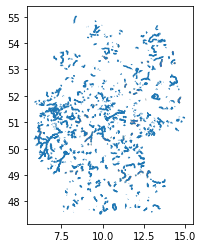

In [35]:
data.plot()

In [36]:
bew=pd.read_csv('alle_bew.csv')

In [37]:
bew['id_b']=bew.link.str.split('#').str[1]

In [38]:
bew

,id,name,bewertungsstufe,link,id_b
0,BW 2.01,Wanderbahn: Mudau  Mosbach,Bewertung mit 4 Rädern,bahn_bw.htm#bw2_01,bw2_01
1,BW 2.08,Radfernweg Stauferland: Göppingen-Faurndau  ...,Bewertung mit 4 Rädern,bahn_bw.htm#bw2_08,bw2_08
2,BW 2.13,Reutlingen  Lichtenstein (ehem. Zahnradbahn),Bewertung mit 4 Rädern,bahn_bw.htm#bw2_13,bw2_13
3,BY 1.01a,Rhönexpress-Bahnradweg: Zeitlofs  Wildflecken,Bewertung mit 4 Rädern,bahn_by.htm#by1_01a,by1_01a
4,BY 1.07,Gaubahn-Radwanderweg: Ochsenfurt  Röttingen ...,Bewertung mit 4 Rädern,bahn_by.htm#by1_07,by1_07
...,...,...,...,...,...
783,SN 3.06,Goßdorf-Kohlmühle  Lohsdorf  Hohnstein (in ...,Noch nicht bewertet,bahn_sn.htm#sn3_06,sn3_06
784,ST 1.02a,Hohenwulsch  Bismark,Noch nicht bewertet,bahn_st.htm#st1_02a,st1_02a
785,ST 1.13,Gernrode  Rieder  Ballenstedt,Noch nicht bewertet,bahn_st.htm#st1_13,st1_13
786,TH24,Rudolstadt-Schwarza  Bad Blankenburg,Noch nicht bewertet,bahn_th.htm#th24,th24


In [39]:
merge=data.merge(bew, on='id_b')
merge

,file_name,geometry,elevation,id_b,id,name,bewertungsstufe,link
0,bb01.gpx,"LINESTRING (11.25384 53.13552, 11.25418 53.135...",21.259,bb01,BB01,"Dömitz (MV)  Wittenberge, bei Polz als ""Radw...",Bewertung mit einem Rad,bahn_bb.htm#bb01
1,bb01a.gpx,"LINESTRING (11.75727 52.98951, 11.75734 52.989...",20.630,bb01a,BB01a,Wittenberge,Bewertung mit einem Rad,bahn_bb.htm#bb01a
2,bb02.gpx,"LINESTRING (12.07311 52.82789, 12.07287 52.827...",31.410,bb02,BB02,Kleinbahnroute (ehem. Westprignitzer Kreiskle...,Bewertung mit einem Rad,bahn_bb.htm#bb02
3,bb02a.gpx,"LINESTRING (11.74033 53.17287, 11.74056 53.173...",28.853,bb02a,BB02a,Dallmin  Postlin (Gemeinde Karstädt),Bewertung mit 2 Rädern,bahn_bb.htm#bb02a
4,bb02b.gpx,"MULTILINESTRING ((12.35576 53.28430, 12.35555 ...",84.710,bb02b,BB02b,Freyenstein  Wulfersdorf,Bewertung mit 2 Rädern,bahn_bb.htm#bb02b
...,...,...,...,...,...,...,...,...
736,th32.gpx,"MULTILINESTRING ((11.80863 50.58085, 11.80853 ...",422.881,th32,TH32,Oberlandradweg: Schleiz  Saalburg,Bewertung mit 3 Rädern,bahn_th.htm#th32
737,th36a.gpx,"MULTILINESTRING ((12.12898 50.85683, 12.12944 ...",248.638,th36a,TH36a,westl. Ronneburg (alte Streckenführung),Bewertung mit 0 Rädern,bahn_th.htm#th36a
738,th37.gpx,"MULTILINESTRING ((12.07564 50.87152, 12.07591 ...",199.611,th37,TH37,Bahnhistorischer Erlebnisradweg: Gera  Meuse...,Bewertung mit einem Rad,bahn_th.htm#th37
739,th38.gpx,"LINESTRING (12.22589 50.88038, 12.22691 50.881...",320.256,th38,TH38,Beerwalde  Löbichau,Bewertung mit einem Rad,bahn_th.htm#th38


In [43]:
merge.bewertungsstufe.unique()

array(['Bewertung mit einem Rad', 'Bewertung mit 2 Rädern',
       'Bewertung mit 3 Rädern', 'Bewertung mit 0 Rädern',
       'Bewertung mit 4 Rädern', 'Noch nicht bewertet'], dtype=object)

In [65]:
merge[merge.bewertungsstufe=='Noch nicht bewertet']

,file_name,geometry,elevation,id_b,id,name,bewertungsstufe,link
311,ni3_08b.gpx,"LINESTRING (10.70823 52.38747, 10.70809 52.387...",78.31,ni3_08b,NI 3.08b,Wolfsburg-Ehmen,Noch nicht bewertet,bahn_ni.htm#ni3_08b
367,nw1_18.gpx,"MULTILINESTRING ((6.48148 50.57815, 6.48124 50...",None,nw1_18,NW 1.18,Feldbahn Urfttalsperre,Noch nicht bewertet,bahn_nw.htm#nw1_18
612,sl08.gpx,"LINESTRING (7.17602 49.36170, 7.17600 49.36212...",None,sl08,SL08,Wiebelskirchen,Noch nicht bewertet,bahn_sl.htm#sl08
659,sn3_06.gpx,"LINESTRING (14.11527 50.97813, 14.11555 50.978...",None,sn3_06,SN 3.06,Goßdorf-Kohlmühle  Lohsdorf  Hohnstein (in ...,Noch nicht bewertet,bahn_sn.htm#sn3_06


In [58]:
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")

    color_by_label = dict(zip(labels, colors))
    
    legend_categories = ""     
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
        
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
   

    css = """

    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [103]:
import folium
import branca


df=merge.copy()

basic_attribution='\u0026copy; \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors'
carto_attribution=basic_attribution + ' \u0026copy; \u003ca href=\"http://cartodb.com/attributions\"\u003eCartoDB\u003c/a\u003e, CartoDB \u003ca href =\"http://cartodb.com/attributions\"\u003eattributions\u003c/a\u003e' # <-- note this

btr_attr=' | \u0026copy; \u003ca href=\"http://www.bahntrassenradeln.de/bahntrassenradeln.htm"\u003eBahntrassenradlen\u003c/a\u003e'

##basemap: carto
#m = folium.Map( location=[52.5, 13.35], 
#                zoom_start=9,
#               show=True,
#                #tiles = None
#                tiles='cartodbpositron',
#                name='Carto Light',
#                #attr=carto_attribution + ' | \u0026copy; \u003ca href=\"http://www.bahntrassenradeln.de/bahntrassenradeln.htm"\u003eBahntrassenradlen\u003c/a\u003e')
#               attr= carto_attribution + btr_attr,
#              )
#https://github.com/python-visualization/folium/issues/1340
m = folium.Map((52, 10),zoom_start=8, tiles=None)
#basemap: carto
folium.TileLayer(tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png',
                 name='Carto Light',
                 attr= carto_attribution + btr_attr,
                 show=True,
                 #overlay =True
                 ).add_to(m)

#basemap: sat
folium.TileLayer(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                 name='Esri Satellite',
                 attr= 'Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community' + btr_attr
                 ).add_to(m)
#basemap: OpenCycleMap
folium.TileLayer(tiles='https://tile.thunderforest.com/cycle/{z}/{x}/{y}.png?apikey=98ae7a41b031409bb9dbdad4b5720ae2',
                 name='OpenCycleMap',
                 attr=basic_attribution +  ' | \u0026copy; \u003ca href=\"https://www.opencyclemap.org/"\u003eOpenCycleMap\u003c/a\u003e' + btr_attr
                ).add_to(m)

#basemap: openrailwaymap
folium.TileLayer(tiles='https://c.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
                 name='OpenRailwayMap',
                 attr=basic_attribution + ' | \u0026copy; \u003ca href=\"http://www.openrailwaymap.org"\u003eOpenRailwayMap\u003c/a\u003e' + btr_attr
                ).add_to(m)

#basemap: oepnv
folium.TileLayer(tiles='http://tile.memomaps.de/tilegen/{z}/{x}/{y}.png',
                 name='ÖPNV Karte',
                 attr=basic_attribution + ' | \u0026copy; \u003ca href=\"https://www.öpnvkarte.de"\u003eÖPNV Karte\u003c/a\u003e' + btr_attr
                ).add_to(m)


#
def highlight_function(feature):

    return {
         'weight': 8,
        'color': 'grey'
    }


# icon color
#['Bewertung mit einem Rad', 'Bewertung mit 2 Rädern',
#       'Bewertung mit 3 Rädern', 'Bewertung mit 0 Rädern',
#       'Bewertung mit 4 Rädern', 'Noch nicht bewertet']
def colors(inp):
    if inp == 'Bewertung mit 4 Rädern':
        col='darkgreen'
    elif inp == 'Bewertung mit 3 Rädern':
        col='green'
    elif inp == 'Bewertung mit 2 Rädern':
        col='#328f68'
    elif inp == 'Bewertung mit einem Rad':
        col='orange'
    elif inp == 'Bewertung mit 0 Rädern':
        col='red'

    else:
        col='gray'
    return col

def style_function(feature):

    return {
         'weight': 3,
        'color': colors(feature['properties']['bewertungsstufe'])
    }


dummy=folium.GeoJson(
    df,
    name='Bahntrassenradwege',
   tooltip=folium.GeoJsonTooltip(fields=['name','bewertungsstufe']),
   style_function=style_function,
    highlight_function=highlight_function
).add_to(m)


folium.LayerControl(position='bottomleft',collapsed=True).add_to(m)

m = add_categorical_legend(m, 'Bewertungen',
                             colors = ['darkgreen','green','#328f68','orange','red','gray'],
                           labels = ['Bewertung mit 4 Rädern', 'Bewertung mit 3 Rädern', 'Bewertung mit 2 Rädern', 'Bewertung mit einem Rad','Bewertung mit 0 Rädern', 'Noch nicht bewertet'])
m= add_click_link(m)

In [ ]:
#m

In [104]:
m.save("bahntr_new.html")

In [108]:
# open link in new tab, wen clicking on element. unfortunatly this comes not with folium, so i had the function "manually":

In [102]:
def add_click_link(folium_map):
    
    script = f"""
            <script type="text/javascript">

              function openHtml(id_b) {{
                bland=id_b.substring(0, 2)

                window.open('http://www.bahntrassenradeln.de/bahn_'+ bland +'.htm#' + id_b , '_blank').focus();
                }};


            </script>
      """
   


    folium_map.get_root().header.add_child(folium.Element(script))

    return folium_map

In [ ]:
				click: function(e) {
						openHtml(e.target.feature.properties['id_b'])
                },
        
        
        
--> "bahntr_link.html"